In [1]:
import scipy.io
import numpy as np
import pandas as pd

## Load the IMDB-WIKI dataset

Get the image metadata here: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

Get the pairwise comparison data here: https://github.com/Toloka/IMDB-WIKI-SbS

In [64]:
# Load MATLAB files
wiki = scipy.io.loadmat('./data/imdb-wiki/wiki.mat')
imdb = scipy.io.loadmat('./data/imdb-wiki/imdb.mat')
wiki

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

In [65]:
# Extract file paths
full_path_wiki = wiki['wiki']['full_path'][0][0][0]
full_path_imdb = imdb['imdb']['full_path'][0][0][0]
full_path_wiki

array([array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
       array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
       array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
       array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
       array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
       array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')],
      dtype=object)

In [66]:
# Only keep the file names
filename_wiki = np.array(list(map(lambda x:x.split('/')[1], np.stack(full_path_wiki).flatten())))
filename_imdb = np.array(list(map(lambda x:x.split('/')[1], np.stack(full_path_imdb).flatten())))
filename_wiki

array(['10000217_1981-05-05_2009.jpg', '10000548_1925-04-04_1964.jpg',
       '100012_1948-07-03_2008.jpg', ..., '9998109_1972-12-27_2013.jpg',
       '9999400_1981-12-13_2011.jpg', '999980_1954-06-11_2008.jpg'],
      dtype='<U34')

In [67]:
# Get the genders
gender_wiki = wiki['wiki']['gender'][0][0][0]
gender_imdb = imdb['imdb']['gender'][0][0][0]
gender_imdb

array([1., 1., 1., ..., 0., 0., 0.])

In [68]:
# Convert to DataFrames and concat
imdb_df = pd.DataFrame({'filename': filename_imdb, 'gender': gender_imdb})
wiki_df = pd.DataFrame({'filename': filename_wiki, 'gender': gender_wiki})
gender_df = pd.concat([imdb_df, wiki_df]).reset_index(drop=True)
gender_df

,filename,gender
0,nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,nm0000001_rm980463616_1899-5-10_1968.jpg,1.0
...,...,...
523046,9996949_1937-04-17_1963.jpg,1.0
523047,9997032_1947-07-30_1970.jpg,1.0
523048,9998109_1972-12-27_2013.jpg,1.0
523049,9999400_1981-12-13_2011.jpg,1.0


In [69]:
# Get the ground-truth ages
gt_df = pd.read_csv('./data/imdb-wiki/gt.csv')
gt_df['filename'] = gt_df['label'].apply(lambda x: x.split('/')[-1])
gt_df = gt_df.rename({'score': 'age'}, axis=1)
gt_df

,label,age,filename
0,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm1442940_rm3965098752_1996-10-3_2006.jpg
1,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm4832920_rm1781768448_2003-8-28_2013.jpg
2,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm0652089_rm860657920_1992-3-10_2002.jpg
3,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm0004917_rm1493730304_1969-5-12_1979.jpg
4,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm1113550_rm1332711936_1996-4-14_2006.jpg
...,...,...,...
9145,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,475367_1941-08-03_2011.jpg
9146,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,304085_1919-07-07_1989.jpg
9147,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,nm0001627_rm4164078592_1927-2-20_1997.jpg
9148,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,nm0000024_rm1715129344_1904-4-14_1974.jpg


In [70]:
# merge ground-truth on on 'filename' column
df = pd.merge(gt_df[['age', 'filename']], gender_df[['filename', 'gender']], on='filename', how='left')
df['gender'] = df['gender'].astype(int)
df

,age,filename,gender
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0
...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1
9146,70,304085_1919-07-07_1989.jpg,1
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1


In [71]:
# Import the pairwise comparisons
pairwise_df = pd.read_csv('./data/imdb-wiki/crowd_labels.csv')
pairwise_df['left']  = pairwise_df['left'].apply(lambda x: x.split('/')[-1])
pairwise_df['right'] = pairwise_df['right'].apply(lambda x: x.split('/')[-1])
pairwise_df['label'] = pairwise_df['label'].apply(lambda x: x.split('/')[-1])
pairwise_df

,left,right,label,performer
0,26147732_1991-07-22_2015.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg,0
1,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,nm0000072_rm2497944320_1932-2-27_1985.jpg,0
2,nm0788370_rm2989144320_1971-4-11_1999.jpg,nm0726180_rm2487589632_1981-1-1_2005.jpg,nm0788370_rm2989144320_1971-4-11_1999.jpg,0
3,nm0325390_rm3409478912_1951-10-19_1979.jpg,1094676_1944-12-08_2011.jpg,1094676_1944-12-08_2011.jpg,1
4,1780768_1927-01-22_1963.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg,1
...,...,...,...,...
250244,nm0000943_rm2478151680_1968-1-13_1999.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg,3885
250245,26835279_1938-12-27_2004.jpg,nm0771493_rm519611392_1955-5-27_2013.jpg,26835279_1938-12-27_2004.jpg,3885
250246,2723_1964-05-27_2007.jpg,nm0858969_rm53517056_1990-1-30_2001.jpg,2723_1964-05-27_2007.jpg,4090
250247,nm0177396_rm3601370112_1987-9-15_2010.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg,4090


In [72]:
# replace the values in df2 with their corresponding index in df1
pairwise_df['left']  = pairwise_df['left'].apply(lambda x:  df[df['filename']==x].index[0])
pairwise_df['right'] = pairwise_df['right'].apply(lambda x: df[df['filename']==x].index[0])
pairwise_df['label'] = pairwise_df['label'].apply(lambda x: df[df['filename']==x].index[0])
pairwise_df

,left,right,label,performer
0,2229,3164,3164,0
1,6505,5302,6505,0
2,2822,2139,2822,0
3,2757,8593,8593,1
4,3991,7792,7792,1
...,...,...,...,...
250244,3209,7,7,3885
250245,8533,7276,8533,3885
250246,5025,228,5025,4090
250247,2059,6425,6425,4090


In [73]:
pairwise_df.to_csv('./data/imdb-wiki/comparisons_cleaned.csv', index=False)
df.to_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index=True)

## Subsampling

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df = pd.read_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index_col=0)

### Basic Statistics

In [4]:
counts_left = pairwise_df.groupby(['left'], sort=True).count().reset_index().rename(columns={'left':'id', 'right':'count_left'})[['id','count_left']]
counts_right = pairwise_df.groupby(['right'], sort=True).count().reset_index().rename(columns={'right':'id', 'left':'count_right'})[['id','count_right']]
counts = pd.merge(left=counts_left, right=counts_right, on='id')
counts['total comparisons'] = counts['count_left'] + counts['count_right']
stats = pd.merge(left=counts, right=df[['age','gender']], left_on='id', right_index=True)
stats

,id,count_left,count_right,total comparisons,age,gender
0,0,27,24,51,10,0
1,1,38,26,64,10,0
2,2,30,21,51,10,0
3,3,33,21,54,10,0
4,4,25,25,50,10,0
...,...,...,...,...,...,...
9145,9145,21,27,48,70,1
9146,9146,19,35,54,70,1
9147,9147,32,37,69,70,1
9148,9148,27,19,46,70,1


individuals of gender 0: 4575
individuals of gender 1: 4575
mean # comparisons, gender 0: 54.61901639344262
mean # comparisons, gender 1: 54.77945355191257


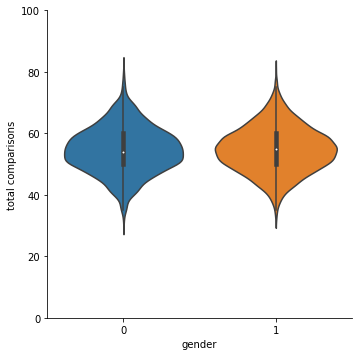

In [76]:
print(f"individuals of gender 0: {len(stats[stats.gender == 0])}")
print(f"individuals of gender 1: {len(stats[stats.gender == 1])}")
print(f"mean # comparisons, gender 0: {stats[stats.gender == 0]['total comparisons'].mean()}")
print(f"mean # comparisons, gender 1: {stats[stats.gender == 1]['total comparisons'].mean()}")

ax = sns.catplot(stats, y='total comparisons', x='gender', kind='violin')
ax.set(ylim=(0,100))
plt.show()

In [5]:
win_lose = pairwise_df[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose.loc[win_lose.left == win_lose.win, 'lose'] = win_lose.right
win_lose.loc[win_lose.right == win_lose.win, 'lose'] = win_lose.left
win_lose['lose'] = win_lose['lose'].astype(int)
win_lose

,left,right,win,lose
0,2229,3164,3164,2229
1,6505,5302,6505,5302
2,2822,2139,2822,2139
3,2757,8593,8593,2757
4,3991,7792,7792,3991
...,...,...,...,...
250244,3209,7,7,3209
250245,8533,7276,8533,7276
250246,5025,228,5025,228
250247,2059,6425,6425,2059


In [6]:
counts_win = win_lose.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
counts_lose = win_lose.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
counts_win_lose = pd.merge(left=counts_win, right=counts_lose, on='id')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
stats_win_lose = pd.merge(left=counts_win_lose, right=df[['age','gender']], left_on='id', right_index=True)
stats_win_lose

,id,number of wins,number of losses,age,gender
0,0,1,50,10,0
1,1,5,59,10,0
2,2,2,49,10,0
3,3,3,51,10,0
4,4,22,28,10,0
...,...,...,...,...,...
9094,9144,4,50,70,1
9095,9145,18,30,70,1
9096,9147,53,16,70,1
9097,9148,33,13,70,1


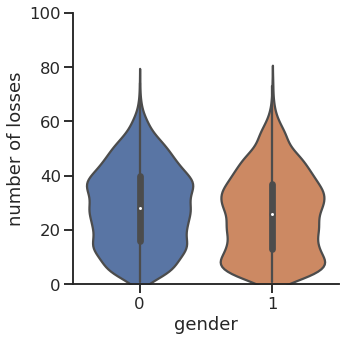

In [71]:
sns.set(rc={'figure.figsize':(4/3*5.8,5.8)})
sns.set_context("talk") # larger font size
sns.set_style('ticks')

ax = sns.catplot(stats_win_lose, y='number of losses', x='gender', kind='violin')
ax.set(ylim=(0,100))
plt.show()

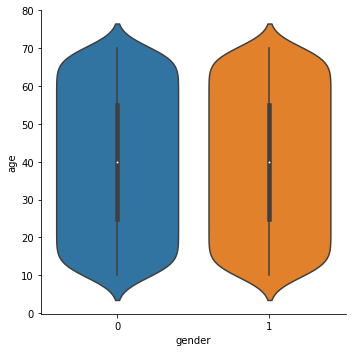

In [69]:
sns.catplot(df, y='age', x='gender', kind='violin')
plt.show()

## Create a DiGraph to Subsample from

In [3]:
import networkx as nx

pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df = pd.read_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index_col=0)

win_lose = pairwise_df[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose.loc[win_lose.left == win_lose.win, 'lose'] = win_lose.right
win_lose.loc[win_lose.right == win_lose.win, 'lose'] = win_lose.left
win_lose['lose'] = win_lose['lose'].astype(int)

G = nx.from_pandas_edgelist(win_lose, source='lose', target='win', create_using=nx.DiGraph)
G

In [4]:
len(list(nx.strongly_connected_components(G)))  # the full dataset has one giant component and some isolates (strong connectivity)

54

In [5]:
tmp_df = df[['age', 'gender']].rename(columns={'age': 'skill'})
tmp_df['minority'] = abs(tmp_df['gender'] - 1)

nx.set_node_attributes(G, tmp_df[['skill', 'minority']].to_dict(orient='index'))

In [6]:
G.nodes(data='skill')

NodeDataView({2229: 24, 3164: 31, 5302: 45, 6505: 53, 2139: 24, 2822: 28, 2757: 28, 8593: 67, 3991: 36, 7792: 61, 1674: 21, 8303: 65, 4317: 38, 5667: 47, 5657: 47, 6377: 52, 6040: 50, 4541: 40, 5192: 44, 8903: 69, 1299: 18, 5052: 43, 2769: 28, 8858: 69, 3702: 34, 2530: 26, 3295: 31, 2124: 24, 1197: 17, 4616: 40, 1207: 18, 8514: 66, 2238: 24, 6509: 53, 2005: 23, 2919: 29, 1161: 17, 3934: 36, 558: 13, 1886: 22, 5914: 49, 1909: 22, 3595: 33, 4970: 43, 2322: 25, 9095: 70, 34: 10, 7004: 56, 4313: 38, 6044: 50, 5647: 47, 3469: 33, 8639: 67, 3996: 36, 6939: 56, 6698: 54, 7049: 56, 2100: 24, 7426: 59, 313: 12, 4378: 39, 565: 13, 6650: 54, 2716: 28, 3025: 30, 278: 11, 8867: 69, 282: 11, 2580: 27, 477: 13, 6580: 53, 1851: 22, 8733: 68, 6695: 54, 7075: 57, 1226: 18, 5294: 45, 7495: 59, 6023: 50, 3662: 34, 614: 14, 3327: 32, 7248: 58, 4059: 37, 5829: 48, 2276: 25, 4076: 37, 5707: 48, 5286: 45, 3179: 31, 5715: 48, 5950: 49, 8258: 65, 5945: 49, 2469: 26, 2918: 29, 3975: 36, 1514: 20, 1506: 20, 2482:

## Testing the Subsampling

In [41]:
random_nodes = df.sample(int(len(df)*0.2), random_state=42)['gender'].index
print(f'selected {len(random_nodes)} nodes')
H = G.subgraph(random_nodes)
nx.is_weakly_connected(H)

selected 1830 nodes


True

In [13]:
random_nodes_0 = df[df.gender == 0].sample(int(len(df)*0.2*0.75), random_state=42)['gender'].index
random_nodes_1 = df[df.gender == 1].sample(int(len(df)*0.2*0.25), random_state=42)['gender'].index
print(f'selected {len(random_nodes_0)} nodes of gender 0')
print(f'selected {len(random_nodes_1)} nodes of gender 1')
H = G.subgraph(list(random_nodes_0) + list(random_nodes_1))
nx.is_weakly_connected(H)

selected 1372 nodes of gender 0
selected 457 nodes of gender 1


True

In [14]:
rng = np.random.default_rng(seed=42)
random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)  # crucially, we ignore edges that have already been re-added (i.e., we don't exclude them from the sample)

In [28]:
I = nx.DiGraph()
I.add_nodes_from(G.nodes(data=True))

In [27]:
I.add_edges_from(list(map(tuple, random_edges)))
nx.is_weakly_connected(I)

False

## Subsample and Recover a Ranking

In [7]:
from fairpair import *

In [8]:
FPG = FairPairGraph()
FPG.add_nodes_from(G.nodes(data=True))

### Random Subsampling

In [8]:
# weak connectivity

rng = np.random.default_rng()
FPG_test = FPG.copy()

for i in range(100):
    # sample 10 times before evaluating again
    for j in range(10):
        random_nodes = df.sample(int(len(df)*0.2))['gender'].index
        H = G.subgraph(random_nodes)
        random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)
        FPG_test.add_edges_from(list(map(tuple, random_edges)))
    print(f"iteration {(i+1)*(j+1)}: {'not ' if not nx.is_weakly_connected(FPG_test) else ''}weakly connected")
    if nx.is_weakly_connected(FPG_test): break

iteration 10: not weakly connected
iteration 20: not weakly connected
iteration 30: not weakly connected
iteration 40: not weakly connected
iteration 50: not weakly connected
iteration 60: not weakly connected
iteration 70: not weakly connected
iteration 80: weakly connected


In [ ]:
# testing the random subsampling on a single run

rng = np.random.default_rng()
FPG_rand = FPG.copy()
connected = False
results = []
ranker = RankRecovery(FPG_rand)
trial = 0

base_scores = {node: score for node, score in FPG.nodes(data='skill')}
minority_nodes = list(FPG_rand.minority.nodes)
majority_nodes = list(FPG_rand.majority.nodes)

for i in range(100):
    # sample 10 times before evaluating again
    for j in range(10):
        random_nodes = df.sample(int(len(df)*0.2))['gender'].index
        H = G.subgraph(random_nodes)
        random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)
        FPG_rand.add_edges_from(list(map(tuple, random_edges)))
    
    ranking, other_nodes = ranker.apply()
    
    if nx.is_weakly_connected(FPG_rand):
        if not connected:
            print(f'Weakly connected after {(i+1)*10} iterations.')
            connected = True
        tau = weighted_tau_nodes(base_scores, ranking, subgraph_nodes=majority_nodes, complementary_nodes=minority_nodes)
        results.append((trial, i*10, tau, 'tau', 'Privileged'))
        tau = weighted_tau_nodes(base_scores, ranking, subgraph_nodes=minority_nodes, complementary_nodes=majority_nodes)
        results.append((trial, i*10, tau, 'tau', 'Unprivileged'))
        exp = exposure_nodes(ranking, subgraph_nodes=majority_nodes)
        results.append((trial, i*10, exp, 'exposure', 'Privileged'))
        exp = exposure_nodes(ranking, subgraph_nodes=minority_nodes)
        results.append((trial, i*10, exp, 'exposure', 'Unprivileged'))
        #tau = weighted_tau_separate(FPG_rand, ranking, FPG_rand.majority)
        #accuracy.append((trial, i*10, tau[0], 'Privileged within-group'))
        #accuracy.append((trial, i*10, tau[1], 'Between groups'))
        #tau = weighted_tau_separate(FPG_rand, ranking, FPG_rand.minority, calc_between=False)
        #accuracy.append((trial, i*10, tau[0], 'Unprivileged within-group'))
        
        print(f'Evaluated {(i+1)*10} iterations.')

In [10]:
results_df = pd.DataFrame(results, columns=['trial', 'iteration', 'value', 'metric', 'group'])
results_df

,trial,iteration,value,metric,group
0,0,70,0.350575,tau,Privileged
1,0,70,0.351035,tau,Unprivileged
2,0,70,0.088686,exposure,Privileged
3,0,70,0.086052,exposure,Unprivileged
4,0,80,0.345785,tau,Privileged
...,...,...,...,...,...
167,0,480,0.085792,exposure,Unprivileged
168,0,490,0.316683,tau,Privileged
169,0,490,0.316317,tau,Unprivileged
170,0,490,0.088932,exposure,Privileged


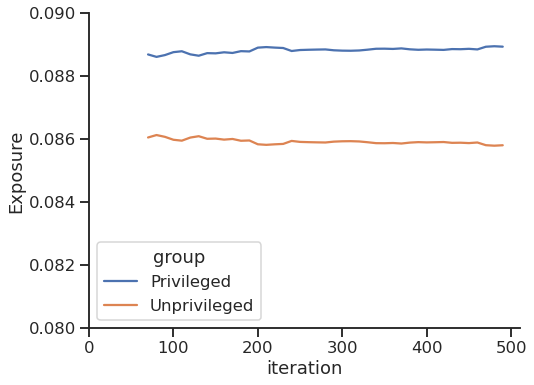

In [19]:
sns.set(rc={'figure.figsize':(4/3*5.8,5.8)})
sns.set_context("talk") # larger font size
sns.set_style('ticks')

tmp_df = results_df[results_df.metric == 'exposure'].copy()
tmp_df['Exposure'] = tmp_df['value']
ax = sns.lineplot(tmp_df, x='iteration', y='Exposure', hue='group', hue_order=['Privileged', 'Unprivileged'])
ax.set(ylim=(0.08,0.09), xlim=(0,None))
sns.despine()

In [22]:
print('Orginal graph:', G.number_of_edges(), 'edges')
print('Subsampled graph after 500 iterations:', FPG_rand.number_of_edges(), 'edges')
print('ratio:', FPG_rand.number_of_edges()/G.number_of_edges()*100, '%')

Orginal graph: 250249 edges
Subsampled graph after 500 iterations: 208628 edges
ratio: 83.36816530735388 %
